- Készítsen lekérdezést, amely megjeleníti, hogy szobánként (SZOBA\_FK) hány olyan foglalás történt, ahol a felnőttek száma nagyobb volt a gyermekek számánál!

a. A lekérdezés jelenítse meg a végösszeget is megfelelően jelölve!

In [11]:
SELECT
    iif(SZOBA_FK is null, 'végösszeg', cast(szoba_fk as nvarchar(5))),
    COUNT(*) AS 'FoglalásokSzama'
from foglalas
WHERE
    FELNOTT_SZAM > GYERMEK_SZAM
GROUP BY rollup(SZOBA_FK)

(190 rows affected)

Total execution time: 00:00:00.033

(No column name),FoglalásokSzama
1,7
2,2
3,3
4,5
5,2
6,5
7,6
8,5
9,4
10,4


Rangsoroljuk az egyes szobákat a foglalások száma, azon belül férőhely szerint!

- Holtverseny esetén a sorszámok sűrűn kövessék egymást
- Az 1-es számot a legtöbbet foglalt, azon belül legkevesebb férőhelyű szoba kapja
- Csak a szoba azonosítója, a férőhely és a helyezés jelenjen meg

In [29]:
select f.szoba_fk,
      sz.ferohely,
        dense_rank() over(order by count(f.foglalas_pk) desc, sz.ferohely) as "rangsor"
from Szoba sz join foglalas f on sz.SZOBA_ID = f.SZOBA_FK
group by f.szoba_fk, sz.FEROHELY

(197 rows affected)

Total execution time: 00:00:00.014

szoba_fk,ferohely,rangsor
58,2,1
182,2,2
185,3,3
70,2,4
94,2,5
12,2,6
172,2,6
35,3,7
48,3,7
74,3,7


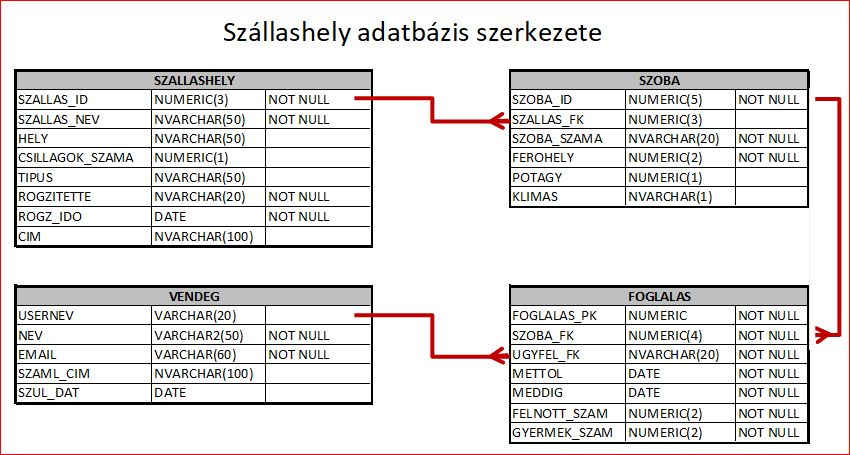

In [19]:
select --VALAMI
from foglalas f join vendeg v on f.ugyfel_fk = v.usernev
WHERE VALAMI
(
select VALAMI
from Vendeg
Where szul_dat VALAMI
(
    select (max(szul_dat))
    from vendeg
)
)


Commands completed successfully.

Total execution time: 00:00:00

In [27]:
select max(szul_dat)--VALAMI
from foglalas f join vendeg v on f.ugyfel_fk = v.usernev
WHERE EXISTS
(
select v.*
from Vendeg
Where szul_dat in
(
    select (max(szul_dat))
    from vendeg
)
)

: Msg 8120, Level 16, State 1, Line 1
Column 'vendeg.USERNEV' is invalid in the select list because it is not contained in either an aggregate function or the GROUP BY clause.

Total execution time: 00:00:00.002